In [0]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from mpl_toolkits import mplot3d

In [0]:
#loading the dataset

X, y = load_iris(return_X_y=True)
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['iris_type'] = iris.target

In [60]:
#data exploration

print(df)
df.describe()

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  iris_type
0                  5.1               3.5  ...               0.2          0
1                  4.9               3.0  ...               0.2          0
2                  4.7               3.2  ...               0.2          0
3                  4.6               3.1  ...               0.2          0
4                  5.0               3.6  ...               0.2          0
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3          2
146                6.3               2.5  ...               1.9          2
147                6.5               3.0  ...               2.0          2
148                6.2               3.4  ...               2.3          2
149                5.9               3.0  ...               1.8          2

[150 rows x 5 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


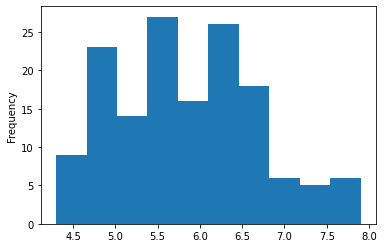

In [68]:
#histogram of the dataset based on sepal length

df['sepal length (cm)'].plot.hist(bins=10)

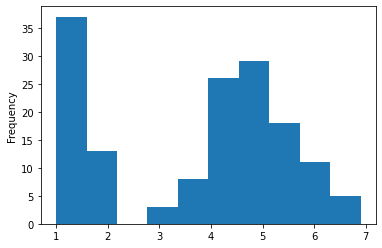

In [69]:
#histogram of the dataset based on petal length

df['petal length (cm)'].plot.hist(bins=10)

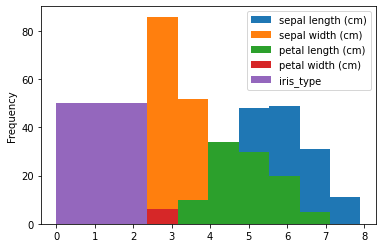

In [70]:
#histogram of the whole dataset

df.plot.hist(bins=10)

Text(0, 0.5, 'sepal width (cm)')

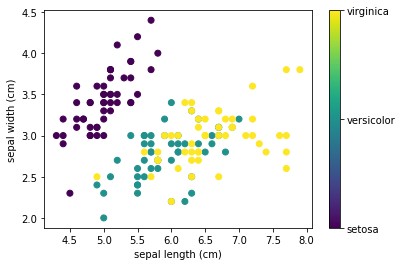

In [90]:
#scatter plot of the whole dataset based on sepal length and sepal width

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Text(0, 0.5, 'petal width (cm)')

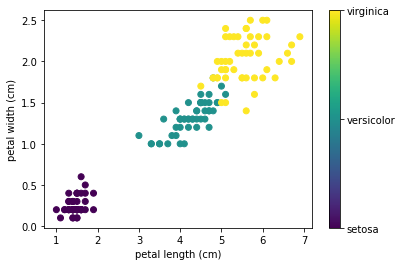

In [91]:
#scatter plot of the whole dataset based on petal length and petal width

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


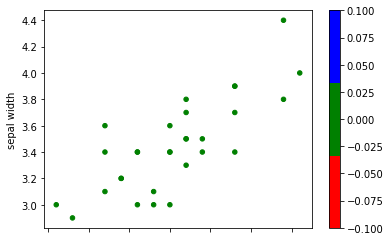

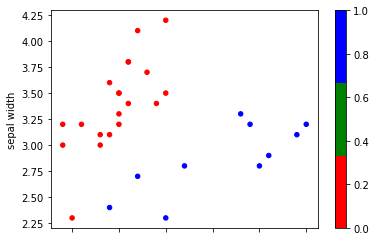

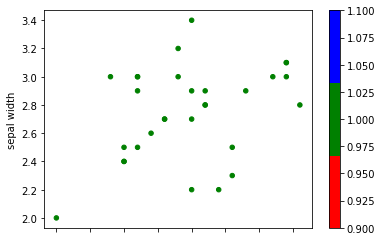

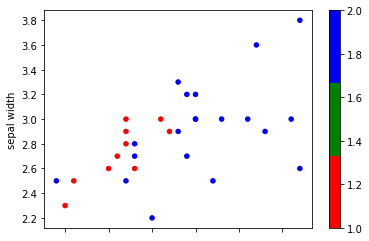

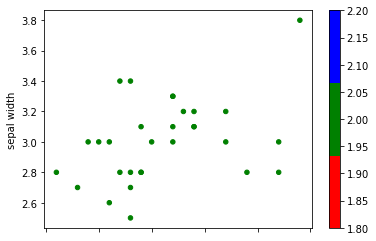

In [81]:
#scatter plot of the bins based on sepal length and sepal width

colors = ['red','green','blue']
labels=[0,1,2]

for i in range(5):
  sep_len=[]
  sep_wid=[]
  x=i*30
  y=(i+1)*30
  for _ in range(x,y):
    sep_len.append(df['sepal length (cm)'][_])
    sep_wid.append(df['sepal width (cm)'][_])
  df2=pd.DataFrame({'sepal length':sep_len,'sepal width':sep_wid}) 
  lab=iris.target[x:y]       
  df2.plot.scatter(y='sepal width',x='sepal length',c=lab,cmap=matplotlib.colors.ListedColormap(colors))
  plt.xlabel('sepal length')  
  print(lab)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


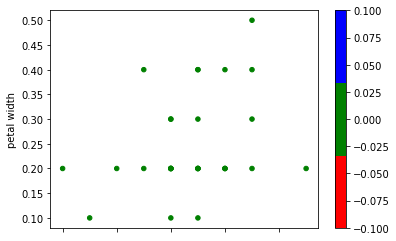

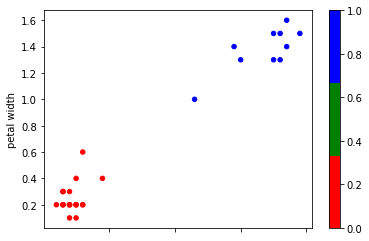

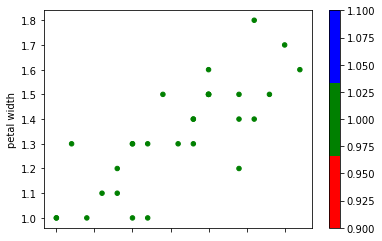

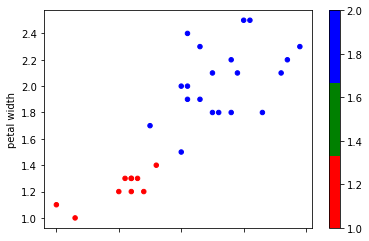

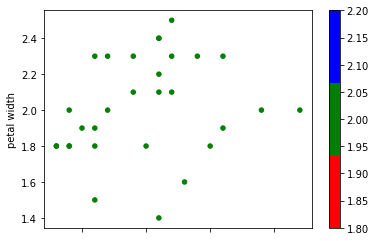

In [84]:
#scatter plot of the bins based on petal length and petal width

for i in range(5):
  pet_len=[]
  pet_wid=[]
  x=i*30
  y=(i+1)*30
  for _ in range(x,y):
    pet_len.append(df['petal length (cm)'][_])
    pet_wid.append(df['petal width (cm)'][_])
  df2=pd.DataFrame({'petal length':pet_len,'petal width':pet_wid})   
  lab=iris.target[x:y]     
  df2.plot.scatter(y='petal width',x='petal length',c=lab,cmap=matplotlib.colors.ListedColormap(colors))   
  print(lab)

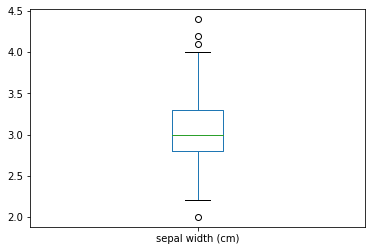

In [6]:
#box plots of all features

df['sepal width (cm)'].plot.box()

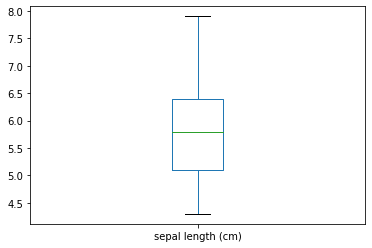

In [7]:
df['sepal length (cm)'].plot.box()

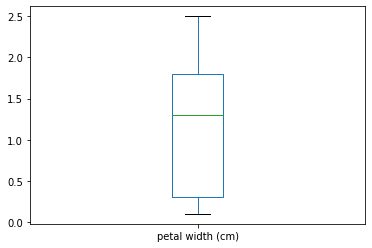

In [8]:
df['petal width (cm)'].plot.box()

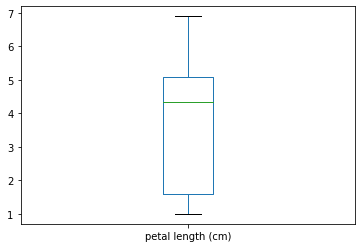

In [9]:
df['petal length (cm)'].plot.box()

In [54]:
#5 fold cross validation 

kf = KFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  res_train, res_test = y[train_index], y[test_index]
  df_train=pd.DataFrame(X_train,columns=iris.feature_names)
  df_train['iris_type']=res_train
  df_test=pd.DataFrame(X_test,columns=iris.feature_names)
  df_test['iris_type']=res_test
  a=df_train.loc[:,'sepal length (cm)':'petal width (cm)']
  b=df_train.iris_type 
  a1=df_test.loc[:,'sepal length (cm)':'petal width (cm)']
  b1=df_test.iris_type

  act=[]
  for _ in b1:
    act.append(_)
  clf=LogisticRegression(max_iter=1e6)
  clf.fit(a,b)
  print("score of fitting of training data for logistic regression = ",end = '')
  print(clf.score(a,b)) 
  print("score of fitting of testing data for logistic regression = ",end = '')
  print(clf.score(a1,b1))                                                         #how well the logistic regression model classified
  pred=clf.predict(a1)
  mae=0
  rmse=0
  for i in range(len(pred)):
    mae+=abs(pred[i]-act[i])
    rmse+=(pred[i]-act[i])**2
  mae/=len(pred)
  rmse/=len(pred)
  print("root mean square error for logistic regression = ",end = '')
  print((rmse)**(0.5))                                                            #root mean square error
  print("mean absolute error for logistic regression = ",end = '')
  print(mae)                                                                     #mean absolute error
  print(confusion_matrix(act,pred))                                               #confusion matrix for three classes
  target_names = ['class 0', 'class 1', 'class 2']
  print(classification_report(act, pred, target_names=target_names))              #classification report for logistic regression    


  clf = GaussianNB()
  clf.fit(a,b)
  print("score of fitting of training data for the Gaussian Naive Bayes classifier = ",end = '')
  print(clf.score(a,b))       
  print("score of fitting of testing data for the Gaussian Naive Bayes classifier = ",end = '')                           #how well the Naive Bayes model classified
  print(clf.score(a1,b1))                                                        
  pred=clf.predict(a1)
  mae=0
  rmse=0
  for i in range(len(pred)):
    mae+=abs(pred[i]-act[i])
    rmse+=(pred[i]-act[i])**2
  mae/=len(pred)
  rmse/=len(pred)
  print("root mean square error for the Gaussian Naive Bayes classifier = ",end = '')
  print((rmse)**(0.5))                                                            #root mean square error
  print("mean absolute error for the Gaussian Naive Bayes classifier = ",end = '')
  print(mae)                                                                      #mean absolute error
  print(confusion_matrix(act,pred))                                               #confusion matrix for three classes
  print(classification_report(act, pred, target_names=target_names))              #classification report for gaussian naive bayes classifier


  kmeans_clf=KMeans(n_clusters=3)                                                 
  kmeans_clf.fit(a)
  pred=kmeans_clf.predict(a1)
  act=[]
  for _ in b1:
    act.append(_)
  mae=0
  rmse=0
  for i in range(len(pred)):
    mae+=abs(pred[i]-act[i])
    rmse+=(pred[i]-act[i])**2
  mae/=len(pred)
  rmse/=len(pred)
  print("root mean square error for kmeans = ",end = '')
  print((rmse)**(0.5))                                                            #root mean square error
  print("mean absolute error for kmeans = ",end = '')
  print(mae)
  print("k means accuracy(in %):", sklearn.metrics.accuracy_score(act, pred)*100) 
  print(confusion_matrix(act,pred))                                               #confusion matrix for three classes
  print(classification_report(act, pred, target_names=target_names))              #classification report for kmeans  

score of fitting of training data for logistic regression = 0.9833333333333333
score of fitting of testing data for logistic regression = 0.9666666666666667
root mean square error for logistic regression = 0.18257418583505536
mean absolute error for logistic regression = 0.03333333333333333
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        11
     class 1       1.00      0.92      0.96        13
     class 2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

score of fitting of training data for the Gaussian Naive Bayes classifier = 0.95
score of fitting of testing data for the Gaussian Naive Bayes classifier = 0.9666666666666667
root mean square error for the Gaussian Naive Bayes classifier = 0.18257418583505536
mean absolute error for the Ga

In [15]:
#principal component analysis

pca = PCA(n_components=4)
pca.fit(a)
print(pca.explained_variance_ratio_)

[0.92583796 0.05219429 0.01658695 0.0053808 ]


In [16]:
#training the model on only the primary feature

aa=df_train.loc[:,'sepal length (cm)':'sepal length (cm)']
bb=df_train.iris_type
clf=LogisticRegression(max_iter=1e6)
clf.fit(aa,bb)
aa1=df_test.loc[:,'sepal length (cm)':'sepal length (cm)']
bb1=df_test.iris_type
print(clf.score(aa1,bb1))
clf=LogisticRegression(max_iter=1e6)
clf.fit(a,b)
print(clf.score(a1,b1))

0.7333333333333333
1.0


mismatch in class 0 =  0
mismatch in class 1 =  0
mismatch in class 2 =  0


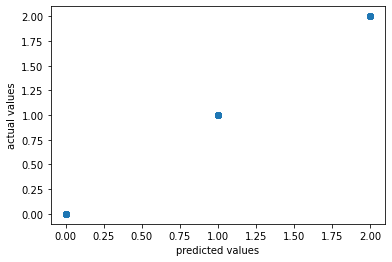

In [107]:
#plotting the misclassified data for logistic regression

clf=LogisticRegression(max_iter=1e6)
clf.fit(a,b)
pred=clf.predict(a1)
act=b1
fig, ax = plt.subplots()
ax.scatter(pred,act)
ax.set_xlabel('predicted values')
ax.set_ylabel('actual values')
mismatch=[0]*3
for i in range(len(pred)):
  if(pred[i]!=act[i]):
    mismatch[pred[i]]+=1
print("mismatch in class 0 = ",mismatch[0])  
print("mismatch in class 1 = ",mismatch[1])
print("mismatch in class 2 = ",mismatch[2])  

mismatch in class 0 =  0
mismatch in class 1 =  2
mismatch in class 2 =  0


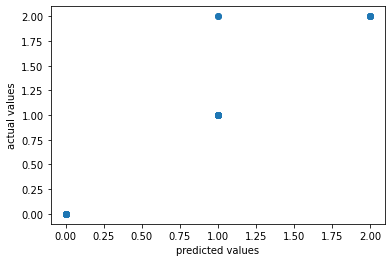

In [109]:
#plotting the misclassified data for gaussian naive bayes

clf=GaussianNB()
clf.fit(a,b)
pred=clf.predict(a1)
act=b1
fig, ax = plt.subplots()
ax.scatter(pred,act)
ax.set_xlabel('predicted values')
ax.set_ylabel('actual values')
mismatch=[0]*3
for i in range(len(pred)):
  if(pred[i]!=act[i]):
    mismatch[pred[i]]+=1
print("mismatch in class 0 = ",mismatch[0])  
print("mismatch in class 1 = ",mismatch[1])
print("mismatch in class 2 = ",mismatch[2])  

mismatch in class 0 =  5
mismatch in class 1 =  2
mismatch in class 2 =  0


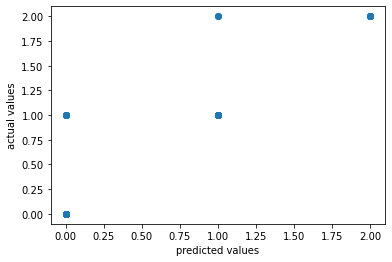

In [143]:
#plotting the misclassified data for KMeans Algorithm

clf=KMeans(n_clusters=3)
clf.fit(a)
pred=clf.predict(a1)
act=[]
for _ in b1:
  act.append(_)
act.sort()  
prediction=[]
for _ in pred:
  prediction.append(_)  
prediction.sort()
fig, ax = plt.subplots()
ax.scatter(prediction,act)
ax.set_xlabel('predicted values')
ax.set_ylabel('actual values')
mismatch=[0]*3
for i in range(len(pred)):
  if(prediction[i]!=act[i]):
    mismatch[prediction[i]]+=1
print("mismatch in class 0 = ",mismatch[0])  
print("mismatch in class 1 = ",mismatch[1])
print("mismatch in class 2 = ",mismatch[2])  